# AI Job Mart Insights Data Analysis and Visualization

## 1. Importing necessary libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from seaborn import heatmap
import random
from scipy.stats import chi2_contingency

## 2. Loading the dataset

In [164]:
df = pd.read_csv('ai_job_market_insights.csv')
df.head(5)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


## 3. Understanding general characteristics

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [166]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


## 4. Data Preparation

Handling duplicates

In [167]:
print(df.duplicated().sum())

0


Handling missing values

In [168]:
print(df.isna().sum())

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64


There are no duplicates or missing values in the dataset thus the data is 'clean' for processing.

## 5. EDA

Learning more about each column of the dataset

#### 5.1 Salary - numerical

In [169]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


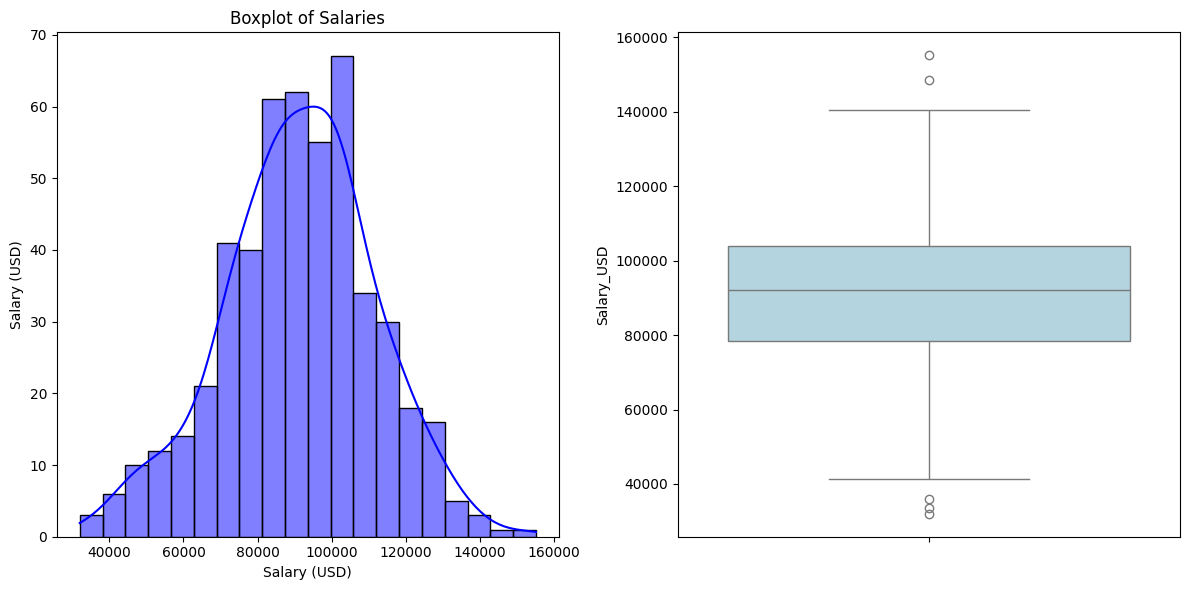

In [170]:
# Variable to store dataframe with salaries
salaries = df.Salary_USD

plt.figure(figsize=(12,6))

# Histogram plot
sal_hist = plt.subplot2grid((1,2), (0,0))
sns.histplot(salaries, bins=20, kde=True, color='blue', ax=sal_hist)
sal_hist.set_title('Histogram of Salaries')
sal_hist.set_xlabel('Salary (USD)')
sal_hist.set_ylabel('Frequency')

# Boxplot
sal_box = plt.subplot2grid((1,2), (0,1))
sns.boxplot(y=salaries, color='lightblue', ax=sal_box)
sal_hist.set_title('Boxplot of Salaries')
sal_hist.set_ylabel('Salary (USD)')

plt.tight_layout()
plt.show()


##### Insights

- Shape: Normal distribution
- Peak: 90k to 100k
- Median salary: 90k (approx.)
- IQR tells us that most salaries lie between 80k and 100k
- There are a few outlier salaries

#### 5.2 Categorical

In [171]:
categorical_columns = df.columns.to_list()
categorical_columns.remove('Salary_USD')
for column in categorical_columns:
    print(f"Value Counts for '{column}': \n {df[column].value_counts()}\n")

Value Counts for 'Job_Title': 
 Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

Value Counts for 'Industry': 
 Industry
Manufacturing         58
Education             57
Technology            56
Telecommunications    53
Finance               53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

Value Counts for 'Company_Size': 
 Company_Size
Small     171
Large     166
Medium    163
Name: count, dtype: int64

Value Counts for 'Location': 
 Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            

## 6. Research Questions

1. How do AI job salaries vary across regions, industries and remote friendliness?
2. What industries are leading AI adoption, and how does this affect job demand and automation risk?
3. What skills are most frequently required for AI jobs and how do they vary by job title and region?
4. Which AI job roles are most in demand, and how do their salaries and job growth projections compare across regions?

### Q1: How do AI job salaries vary across regions, industries and remote friendliness?

#### Grouping the data by Location, Industry, Remote_Friendly

##### By location

In [172]:
df.Location.value_counts()

Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            46
Toronto          41
Name: count, dtype: int64

        Location          mean        median           std
0       New York  93780.426497  93969.706387  19290.752476
1      Singapore  93739.807016  98574.444736  18876.722541
2         Berlin  93240.368944  95247.280689  21175.152537
3          Tokyo  92896.553862  92840.308245  20515.905824
4          Paris  92116.473572  92485.974511  18672.201573
5         Sydney  91885.410215  89440.014701  20485.475863
6  San Francisco  88953.236584  89199.223455  24842.972163
7        Toronto  88839.929183  88517.457871  18045.889832
8         London  88810.672667  86284.888453  20995.020022
9          Dubai  87892.455505  87820.478154  20434.477297


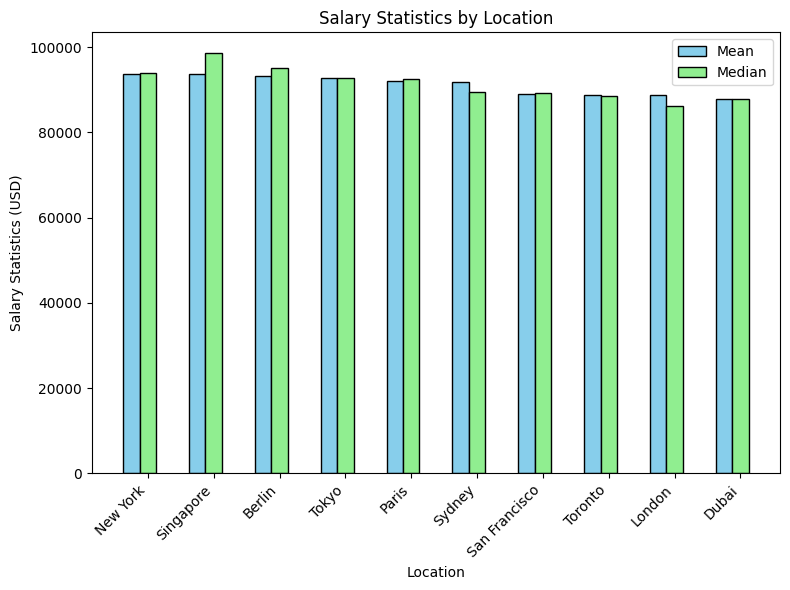

In [173]:
location_stats = df.groupby('Location')['Salary_USD'].agg(['mean', 'median', 'std'])
location_stats = location_stats.sort_values(by='mean', ascending=False).reset_index()
print(location_stats)

x = np.arange(len(location_stats['Location']))
width = 0.25

plt.figure(figsize=(8, 6))
plt.bar(x - width, location_stats['mean'], width, label='Mean', color='skyblue', edgecolor='black')
plt.bar(x, location_stats['median'], width, label='Median', color='lightgreen', edgecolor='black')
plt.xlabel('Location')
plt.ylabel('Salary Statistics (USD)')
plt.title('Salary Statistics by Location')
plt.xticks(x, location_stats['Location'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Conclusion**:  

- The range of mean salaries is not too large but New York has the highest salaries while Dubai has the lowest.

##### By industry

In [174]:
df.Industry.value_counts()

Industry
Manufacturing         58
Education             57
Technology            56
Telecommunications    53
Finance               53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

             Industry          mean        median           std
0             Finance  94355.465599  93002.692680  24118.938069
1       Entertainment  94291.233910  92422.938037  20517.352871
2           Education  93798.521907  93466.828474  18048.050378
3              Energy  92763.939416  90737.496084  20374.357683
4          Healthcare  91688.504404  95028.254342  23190.630703
5              Retail  91232.897408  95925.852901  21366.968071
6          Technology  91204.011373  88453.210018  17236.347741
7  Telecommunications  90418.304458  92269.380734  20839.501024
8       Manufacturing  86590.003715  85666.192710  17099.365197
9      Transportation  85058.296977  88539.330404  22711.628907


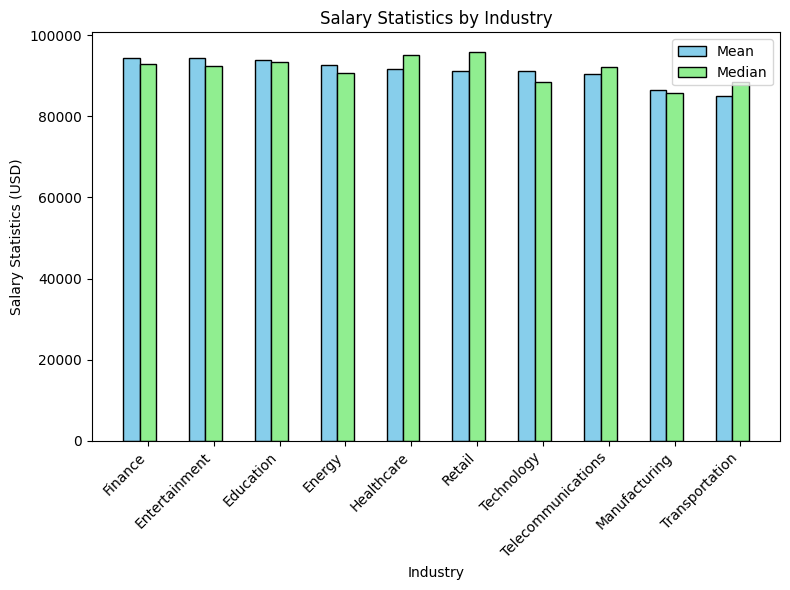

In [175]:
indusrty_stats = df.groupby('Industry')['Salary_USD'].agg(['mean', 'median', 'std'])
indusrty_stats = indusrty_stats.sort_values(by='mean', ascending=False).reset_index()
print(indusrty_stats)

x = np.arange(len(indusrty_stats['Industry']))
width = 0.25

plt.figure(figsize=(8, 6))
plt.bar(x - width, indusrty_stats['mean'], width, label='Mean', color='skyblue', edgecolor='black')
plt.bar(x, indusrty_stats['median'], width, label='Median', color='lightgreen', edgecolor='black')
plt.xlabel('Industry')
plt.ylabel('Salary Statistics (USD)')
plt.title('Salary Statistics by Industry')
plt.xticks(x, indusrty_stats['Industry'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Conclusion**: 

- Finance industry leads with the highest average salary in AI jobs while Transportation industry trails. However, transportation also has less entries.

##### By Remote Jobs

In [176]:
df.Remote_Friendly.value_counts()

Remote_Friendly
Yes    251
No     249
Name: count, dtype: int64

  Remote_Friendly          mean        median           std
0             Yes  91694.123935  91566.973379  19943.194112
1              No  90746.868994  92250.314232  21084.282720


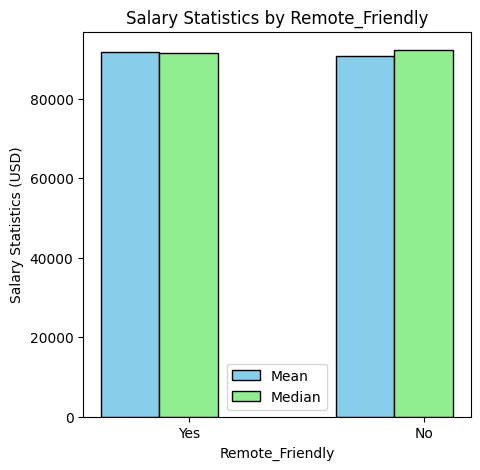

In [177]:
remote_stats = df.groupby('Remote_Friendly')['Salary_USD'].agg(['mean', 'median', 'std'])
remote_stats = remote_stats.sort_values(by='mean', ascending=False).reset_index()
print(remote_stats)

x = np.arange(len(remote_stats['Remote_Friendly']))
width = 0.25

plt.figure(figsize=(5, 5))
plt.bar(x - width, remote_stats['mean'], width, label='Mean', color='skyblue', edgecolor='black')
plt.bar(x, remote_stats['median'], width, label='Median', color='lightgreen', edgecolor='black')
plt.xlabel('Remote_Friendly')
plt.ylabel('Salary Statistics (USD)')
plt.title('Salary Statistics by Remote_Friendly')
plt.xticks(x, remote_stats['Remote_Friendly'])
plt.legend()
plt.show()

**Conclusion**:

- Remote jobs offer a bit more salary.

#### Investigating correlations between Remote Friendliness and each Industry and Location

##### Remote Friendliness and Location

Remote_Friendly  No  Yes
Location                
San Francisco    31   31
Dubai            22   29
Paris            18   28
Tokyo            24   27
London           20   26
New York         25   24
Singapore        30   24
Berlin           27   21
Toronto          20   21
Sydney           32   20


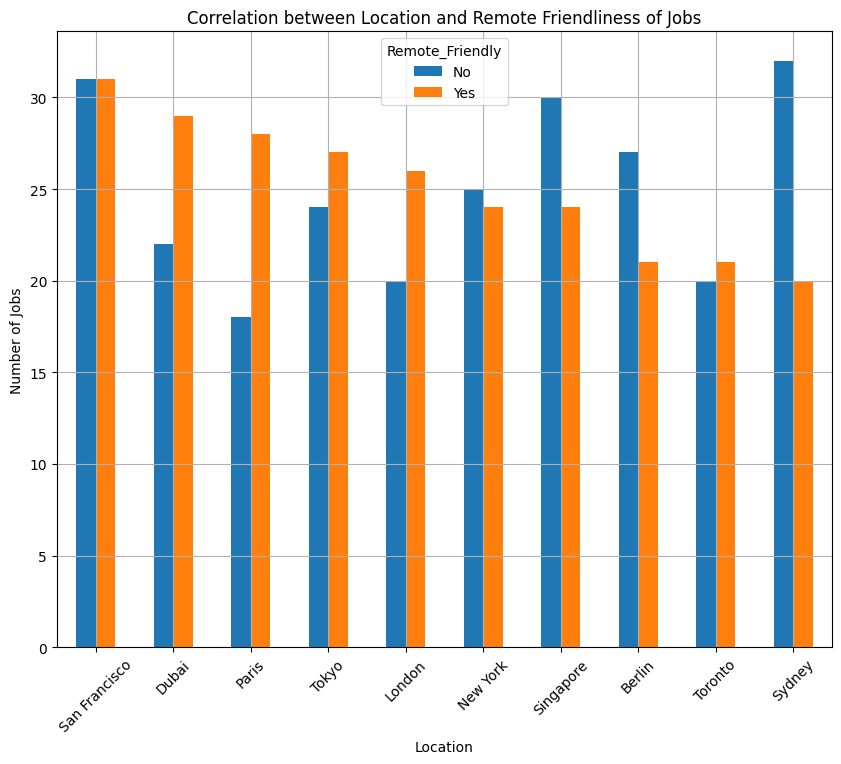

In [178]:
crossTab_on_Location_Remote = pd.crosstab(index=df['Location'],columns=df['Remote_Friendly']).sort_values(by='Yes', ascending=False)
print(crossTab_on_Location_Remote)

crossTab_on_Location_Remote.plot.bar(figsize=(10,8), title='Correlation between Location and Remote Friendliness of Jobs', ylabel='Number of Jobs', rot=45, grid=True)
plt.show()

**Conclusions**:

1. San Francisco shows an even 50-50 split between remote and non-remote jobs while still being the highest in number of remote job opportunities.
2. Sydney has the lowest proportion of remote-friendly jobs while still leading in non-remote opportunities

##### Remote Friendliness and Industry

In [179]:
crossTab_on_Industry_Remote = pd.crosstab(index=df['Industry'],columns=df['Remote_Friendly']).sort_values(by='Yes', ascending=False)

crossTab_on_Industry_Remote.plot.bar(figsize=(10,8), title='Correlation between Industry and Remote Friendliness of Jobs', ylabel='Number of Jobs', rot=45, grid=True)
plt.show()

crossTab_on_Industry_Remote['Percentage_Remote'] = (
    crossTab_on_Industry_Remote['Yes'] /
    (crossTab_on_Industry_Remote['Yes'] + crossTab_on_Industry_Remote['No']) * 100
)

print(crossTab_on_Industry_Remote.sort_values(by='Percentage_Remote', ascending=False))

KeyboardInterrupt: 

**Conclusions**:

1. Entertainment and Healthcare stand out with the highest percentages of remote-friendly positions (around 60% and 57% respectively)
2. Manufacturing and Retail have the lowest (around 43% each)
3. Most of the other industries have a relatively balanced split, showing higher acceptance of remote jobs.

#### Final Visualization of Conclusions.

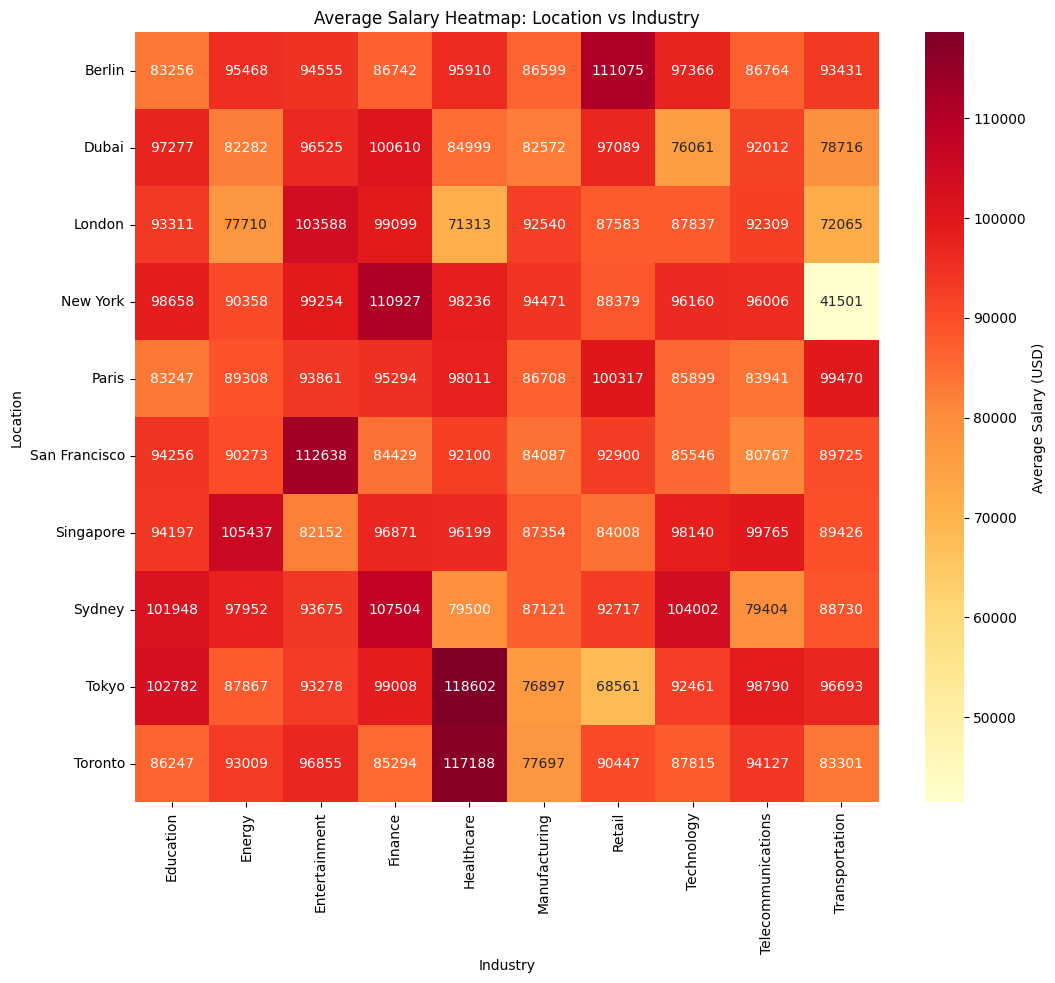

In [67]:
salary_heatmap = df.pivot_table(
        values='Salary_USD', 
        index='Location', 
        columns='Industry', 
        aggfunc='mean'
    )

plt.figure(figsize=(12,10))
sns.heatmap(salary_heatmap, 
                cmap='YlOrRd', 
                annot=True, 
                fmt='.0f',
                cbar_kws={'label': 'Average Salary (USD)'})

plt.title('Average Salary Heatmap: Location vs Industry')
plt.show()

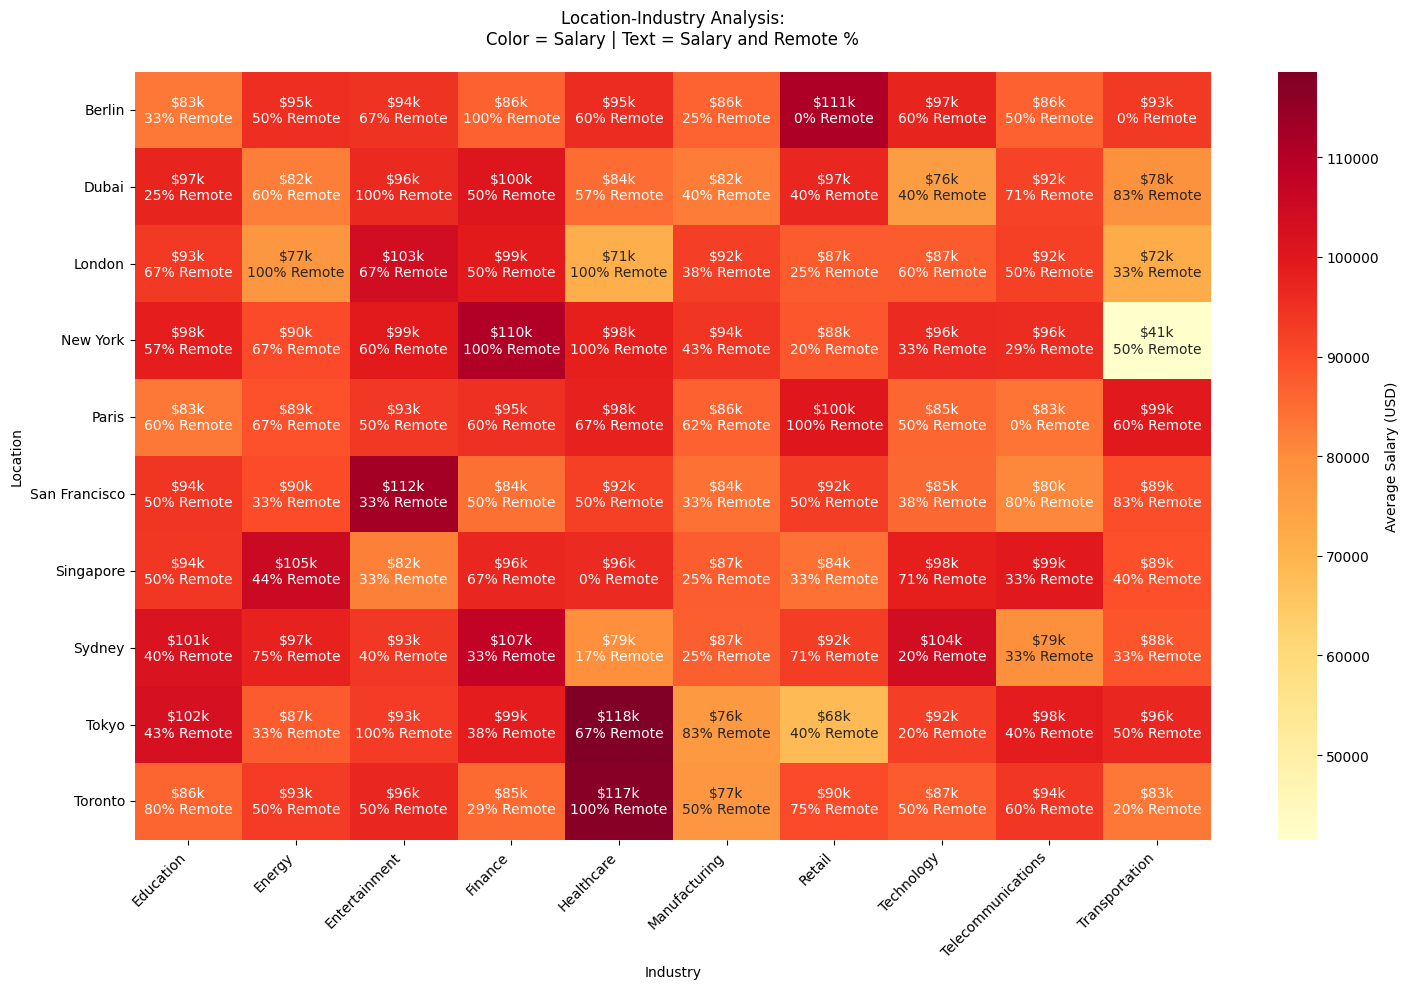

In [68]:
# Group data by location and industry and calculate how remote friendly by percentage
heatmap_data = df.groupby(['Location', 'Industry']).agg({
    'Remote_Friendly': lambda x: (x == 'Yes').mean() * 100,
    'Salary_USD': 'mean'
}).reset_index()

# Pivot the data for the heatmap by remoteness and salary
remote_pivot = heatmap_data.pivot(
    index='Location',
    columns='Industry',
    values='Remote_Friendly'
)

salary_pivot = heatmap_data.pivot(
    index='Location',
    columns='Industry',
    values='Salary_USD'
)

# Create the plot
plt.figure(figsize=(15, 10))

# Create annotation text combining salary and remote percentage
annotations = np.array([
    [f'${int(sal/1000)}k\n{rem:.0f}% Remote' 
        for sal, rem in zip(row_sal, row_rem)]
    for row_sal, row_rem in zip(salary_pivot.values, remote_pivot.values)
])

# Create heatmap using salary_pivot
sns.heatmap(salary_pivot,
            cmap='YlOrRd',
            annot=annotations,
            fmt='',
            cbar_kws={'label': 'Average Salary (USD)'},
            vmin=salary_pivot.min().min(), 
            vmax=salary_pivot.max().max()) 

plt.title('Location-Industry Analysis:\nColor = Salary | Text = Salary and Remote %', pad=20) 
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

**Conclusion**:

The best combination for industry, location and remote friendliness in descending order are:
1. A remote job in Tokyo in Healthcare - $118k
2. A remote healthcare job in Toronto - $117k
3. A non-remote job at San-Fransisco in Entertainment - $112k
4. A non-remote job in Berlin in the Retail industry - $111k

### Q2: What industries are leading in AI adoption and how does this affect job demand and automation risk?

In [69]:
df.Industry.value_counts()

Industry
Manufacturing         58
Education             57
Technology            56
Telecommunications    53
Finance               53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

#### Grouping by AI Adoption Level

AI_Adoption_Level   Low  Medium  High
Industry                             
Healthcare           10      15    17
Retail               13      19    14
Technology           16      27    13
Transportation       16      11    12
Entertainment        17      17    13
Manufacturing        18      23    17
Finance              19      19    15
Energy               20      14    15
Telecommunications   22      16    15
Education            23      18    16


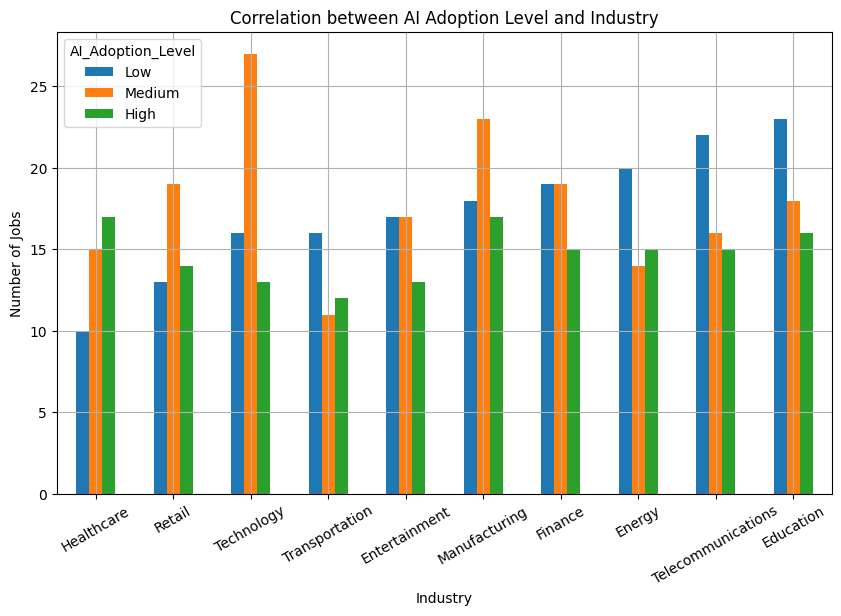

In [70]:
crossTab_on_Industry_Adoption = pd.crosstab(index=df['Industry'],columns=df['AI_Adoption_Level']).sort_values(by='Low')
crossTab_on_Industry_Adoption = crossTab_on_Industry_Adoption[['Low', 'Medium', 'High']]
print(crossTab_on_Industry_Adoption)

crossTab_on_Industry_Adoption.plot.bar(figsize=(10,6), title='Correlation between AI Adoption Level and Industry', ylabel='Number of Jobs', rot=30, grid=True)
plt.show()


**Conclusion**:

1. Healthcare and Manufacturing have the highest adoption level of AI but Healthcare seems to be moving towards it more than Manufacturing i.e the rising trend.
2. Technology is the industry using the most AI.


#### Grouping by Automation Risk

Automation_Risk     Low  Medium  High
Industry                             
Transportation       11       9    19
Healthcare           14      17    11
Manufacturing        16      23    19
Education            16      19    22
Retail               16      19    11
Finance              16      20    17
Technology           17      22    17
Entertainment        17      12    18
Telecommunications   17      18    18
Energy               18      14    17


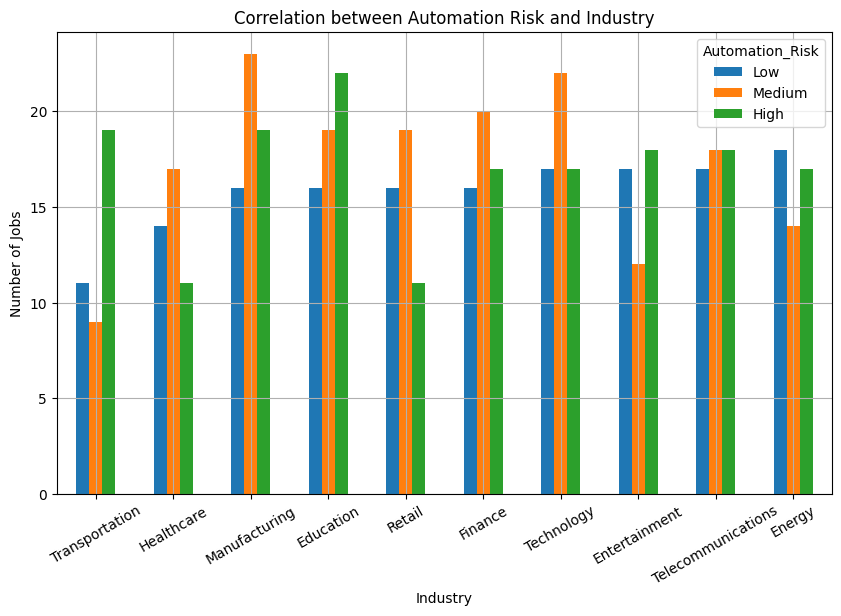

In [71]:
crossTab_on_Industry_Risk = pd.crosstab(index=df['Industry'],columns=df['Automation_Risk'])
crossTab_on_Industry_Risk = crossTab_on_Industry_Risk.sort_values(by='Low')
crossTab_on_Industry_Risk = crossTab_on_Industry_Risk[['Low', 'Medium', 'High']]
print(crossTab_on_Industry_Risk)

crossTab_on_Industry_Risk.plot.bar(figsize=(10,6), title='Correlation between Automation Risk and Industry', ylabel='Number of Jobs', rot=30, grid=True)
plt.show()

**Conclusions**:

- Education and Manufacturing have the relatively highest automation risk while Transportation has the lowest. 

#### Testing correlation between AI adoption and job demand using the chi square test (so that we can determine if it is just by chance or a relationship exists)

Null Hypothesis: There is no association between AI adoption level and job growth projection.

Alternative Hypothesis:
There is an association between AI adoption level and job growth projection.

In [ ]:
confusion_matrix = pd.crosstab(df['AI_Adoption_Level'], df['Job_Growth_Projection'])
chi2, p, dof, expected = chi2_contingency(confusion_matrix)

print(f"Chi-squared Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

confusion_matrix


Chi-squared Statistic: 2.38
P-value: 0.6670


Job_Growth_Projection,Decline,Growth,Stable
AI_Adoption_Level,,,
High,55,46,46
Low,52,61,61
Medium,62,62,55


**Conclusion**:

- With a p-value of 0.667, we fail to reject (i.e., agree with) the null hypothesis. This means there is no evidence of a significant relationship between AI adoption levels and growth projections.

- This implies that the distributions are more likely due to chance rather than a meaningful association

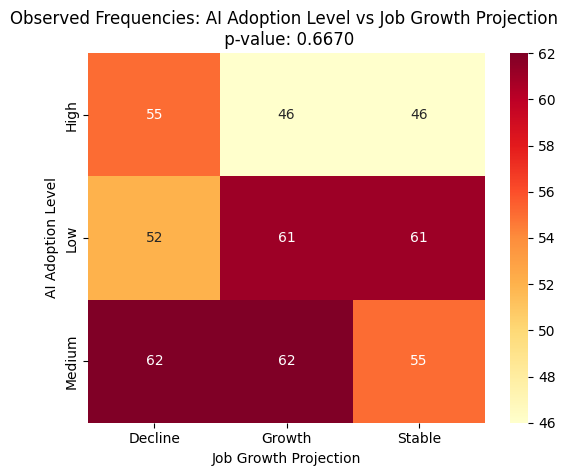

In [73]:
sns.heatmap(confusion_matrix, annot=True, cmap='YlOrRd', cbar=True)
plt.title(f'Observed Frequencies: AI Adoption Level vs Job Growth Projection \n p-value: {p:.4f}')
plt.xlabel('Job Growth Projection')
plt.ylabel('AI Adoption Level')
plt.show()

#### Growth Projections for each Industry

<Figure size 1500x1000 with 0 Axes>

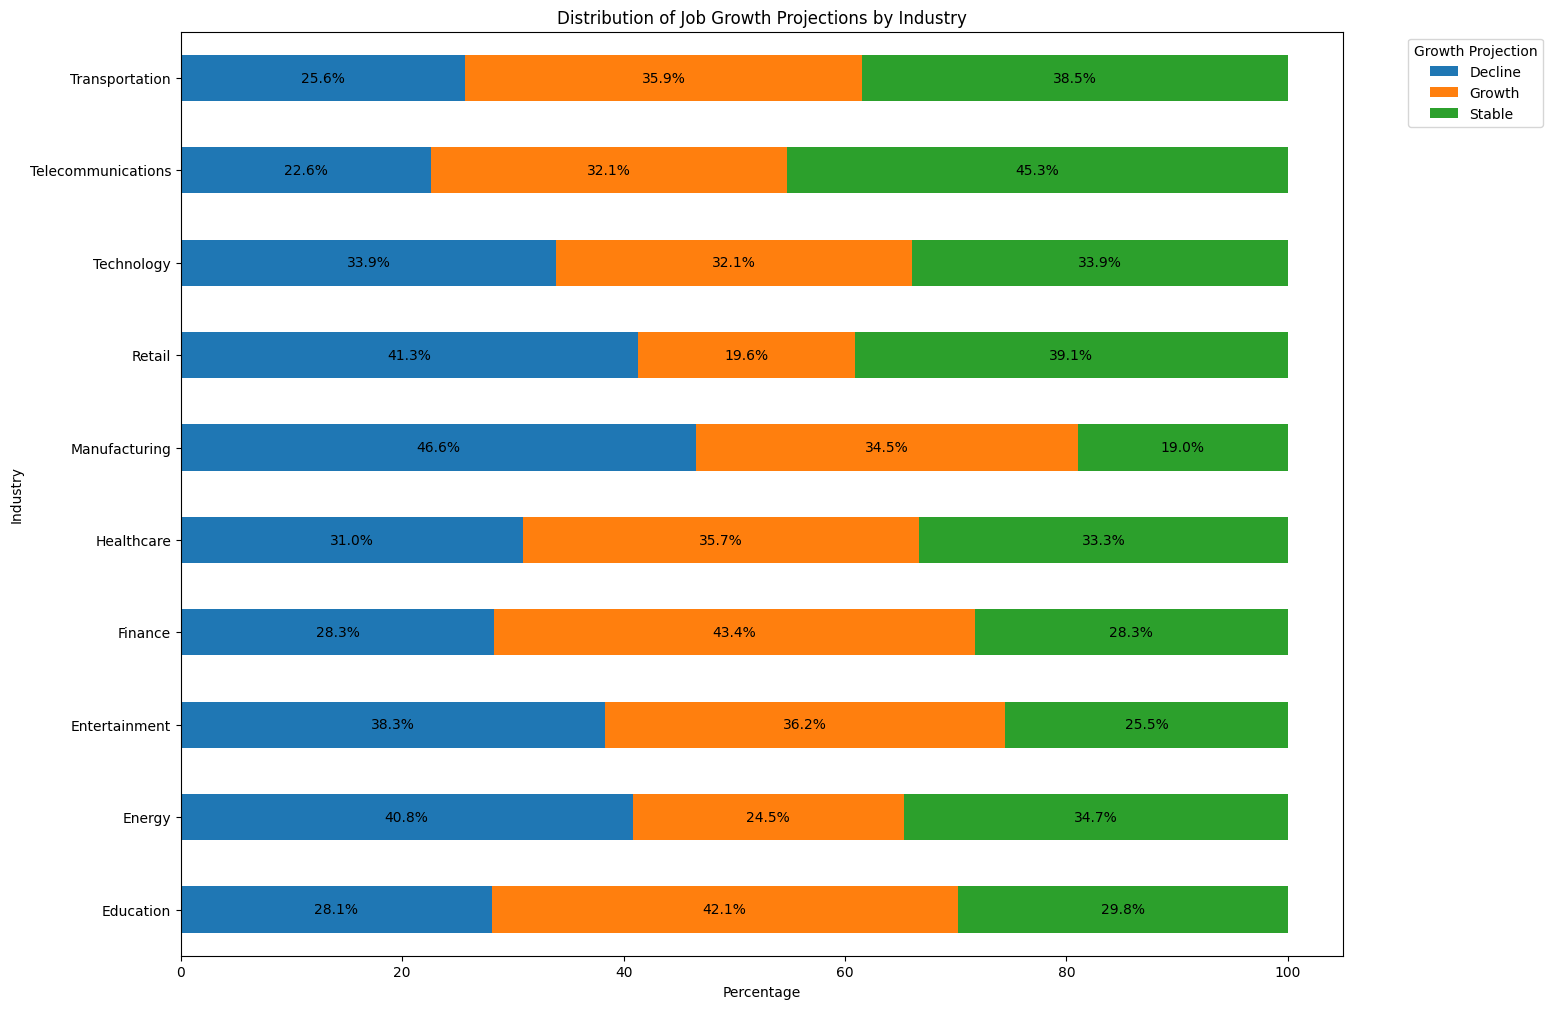


Conclusion:
Job_Growth_Projection  Decline  Growth  Stable
Industry                                      
Education                   16      24      17
Energy                      20      12      17
Entertainment               18      17      12
Finance                     15      23      15
Healthcare                  13      15      14
Manufacturing               27      20      11
Retail                      19       9      18
Technology                  19      18      19
Telecommunications          12      17      24
Transportation              10      14      15


In [74]:
plt.figure(figsize=(15, 10))
cross_tab_on_Industry_Growth = pd.crosstab(df['Industry'], df['Job_Growth_Projection'], normalize='index') * 100

# Create stacked bar chart
ax = cross_tab_on_Industry_Growth.plot(kind='barh', 
                    stacked=True, 
                    figsize=(15,12))

plt.title('Distribution of Job Growth Projections by Industry')
plt.ylabel('Industry')
plt.xlabel('Percentage')
plt.legend(title='Growth Projection', bbox_to_anchor=(1.05, 1))

# Add percentage labels on the bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

# plt.tight_layout()
plt.show()

print("\nConclusion:")
print(pd.crosstab(df['Industry'], df['Job_Growth_Projection']))

**Conclusions**: 

1. There is a decline in jobs in the Manufacturing industry as the AI adoption grows.
2. Telecommunication jobs remain the most stable despite AI introduction.
3. Finance jobs grow more with AI introduction

### Q3: What skills are most requently required for AI jobs and how do they vary by job title and region?

#### Discovering the top skills overall

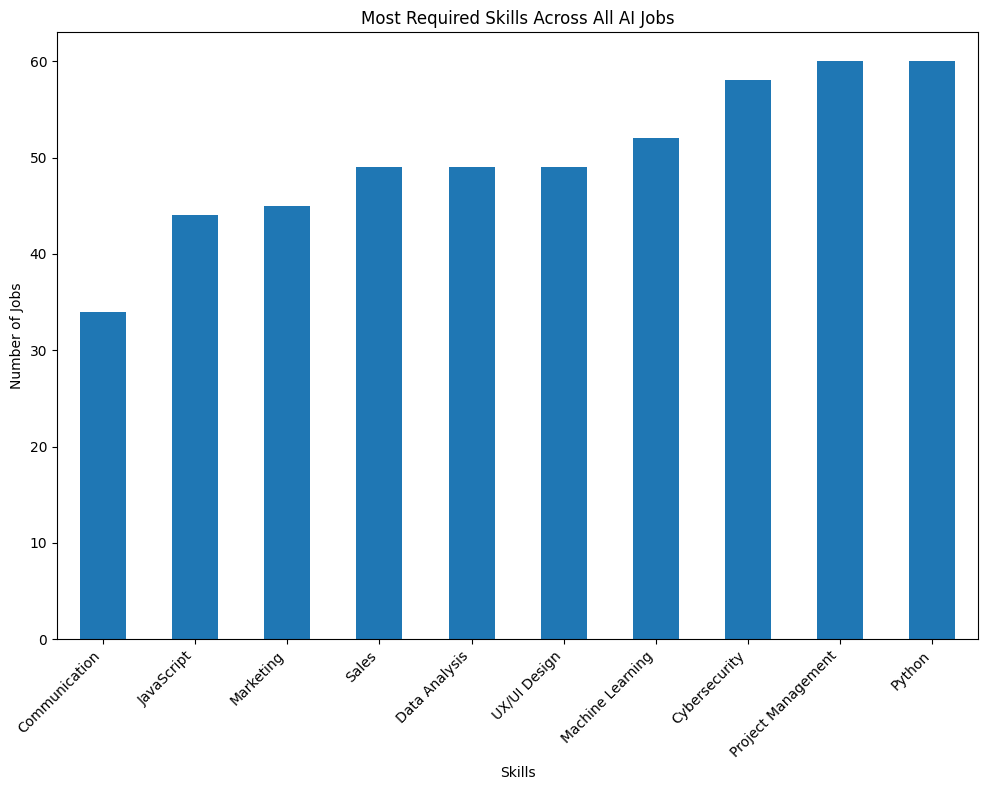

Required_Skills
Communication         34
JavaScript            44
Marketing             45
Sales                 49
Data Analysis         49
UX/UI Design          49
Machine Learning      52
Cybersecurity         58
Project Management    60
Python                60
Name: count, dtype: int64

In [75]:
total_skills = df['Required_Skills'].value_counts().sort_values()

plt.figure(figsize=(10,8))
total_skills.plot(kind='bar')
plt.title('Most Required Skills Across All AI Jobs')
plt.xlabel('Skills')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

total_skills

**Conclusion**

- Python and Project management are the most sought-after skills while Communication is the least considered

#### Skills by region

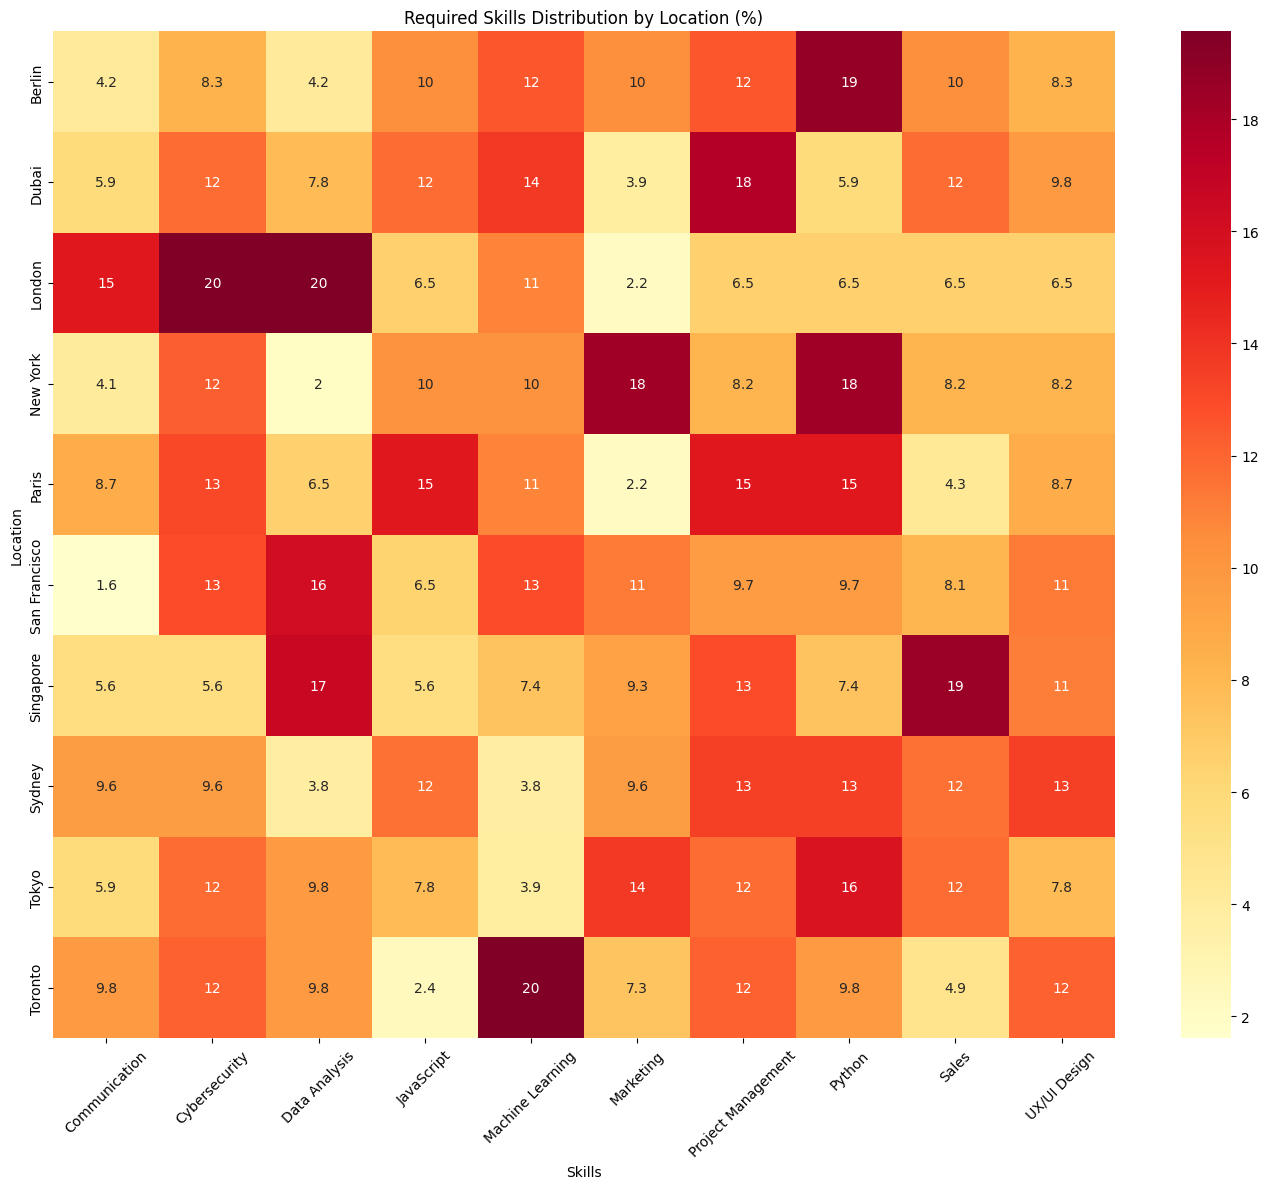

In [76]:
skills_by_location = pd.crosstab(df['Location'], df['Required_Skills'], normalize='index') * 100

plt.figure(figsize=(14,12))
sns.heatmap(data=skills_by_location, cmap='YlOrRd', annot=True)
plt.title('Required Skills Distribution by Location (%)')
plt.xlabel('Skills')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Skills by Job Title

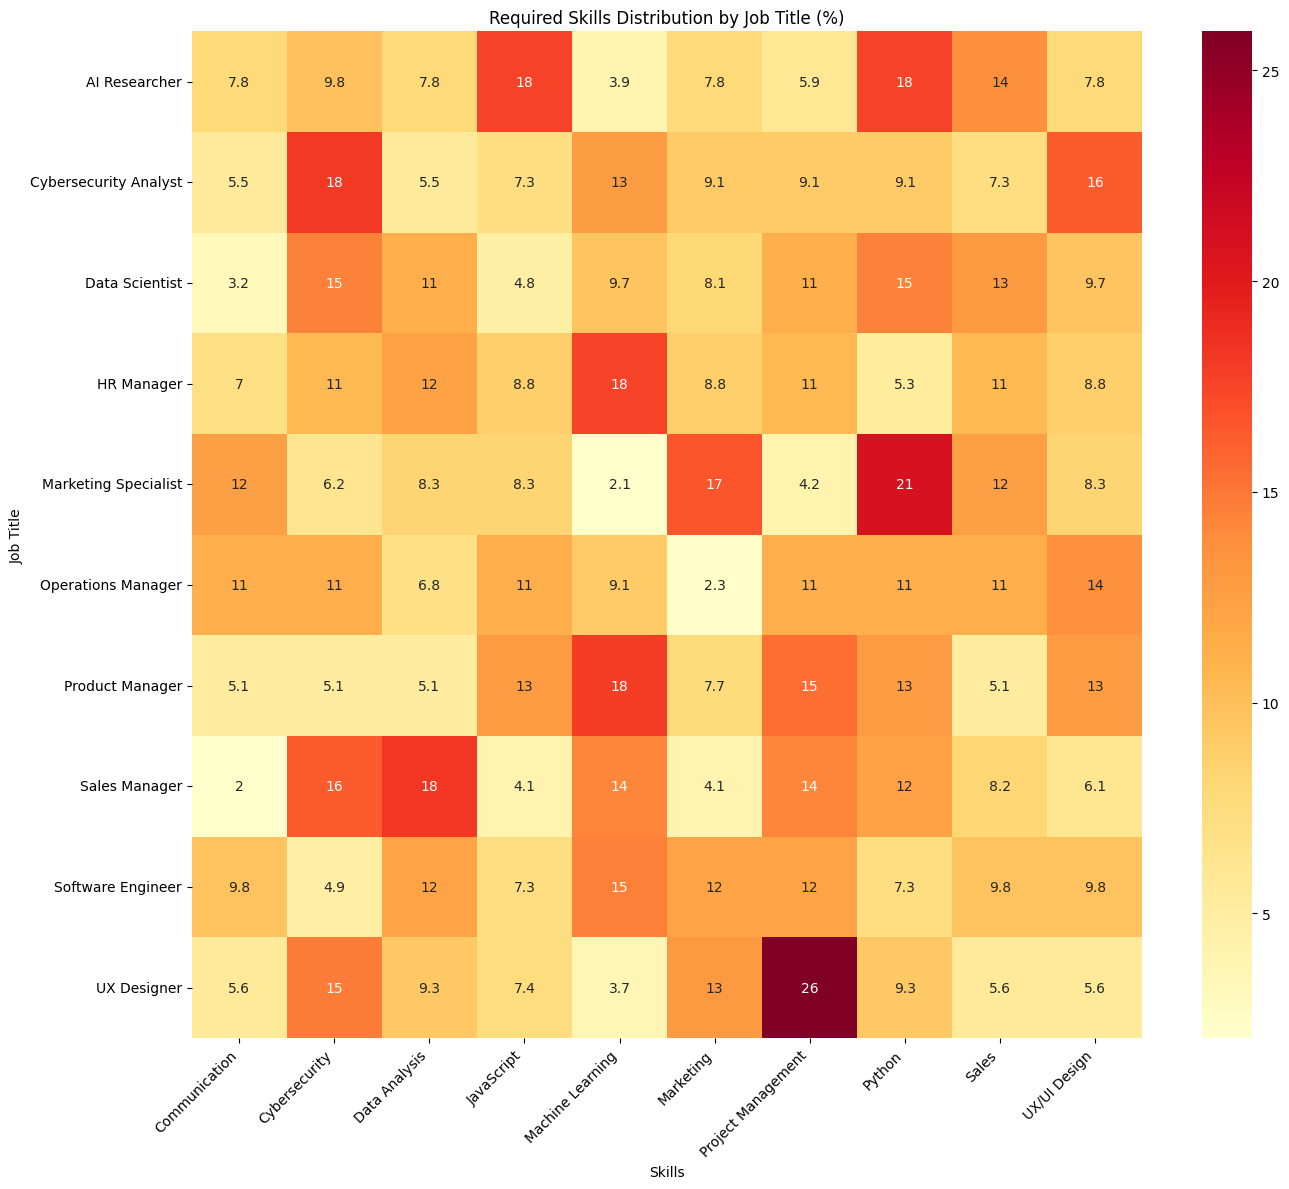

In [77]:
title_skill_matrix = pd.crosstab(df['Job_Title'], df['Required_Skills'], normalize='index') * 100

plt.figure(figsize=(14, 12))
sns.heatmap(title_skill_matrix, cmap='YlOrRd', annot=True)
plt.title('Required Skills Distribution by Job Title (%)')
plt.xlabel('Skills')
plt.ylabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Summary of Findings

In [78]:
print("\nOverall Skill Distribution:")
print(total_skills)

print("\nTop Skills by Location:")
for location in df['Location'].unique():
    location_skills = df[df['Location'] == location]['Required_Skills'].value_counts().head(3)
    print(f"\n{location}:")
    print(location_skills)

print("\nTop Skills by Job Title:")
for title in df['Job_Title'].unique():
    title_skills = df[df['Job_Title'] == title]['Required_Skills'].value_counts().head(3)
    print(f"\n{title}:")
    print(title_skills)


Overall Skill Distribution:
Required_Skills
Communication         34
JavaScript            44
Marketing             45
Sales                 49
Data Analysis         49
UX/UI Design          49
Machine Learning      52
Cybersecurity         58
Project Management    60
Python                60
Name: count, dtype: int64

Top Skills by Location:

Dubai:
Required_Skills
Project Management    9
Machine Learning      7
Sales                 6
Name: count, dtype: int64

Singapore:
Required_Skills
Sales                 10
Data Analysis          9
Project Management     7
Name: count, dtype: int64

Berlin:
Required_Skills
Python                9
Project Management    6
Machine Learning      6
Name: count, dtype: int64

Tokyo:
Required_Skills
Python           8
Marketing        7
Cybersecurity    6
Name: count, dtype: int64

San Francisco:
Required_Skills
Data Analysis       10
Cybersecurity        8
Machine Learning     8
Name: count, dtype: int64

London:
Required_Skills
Cybersecurity    9
Da

### Q4: Which AI job roles are most in demand,and how do their salaries and job growth projections compare across regions?

#### Discovering Job Distribution

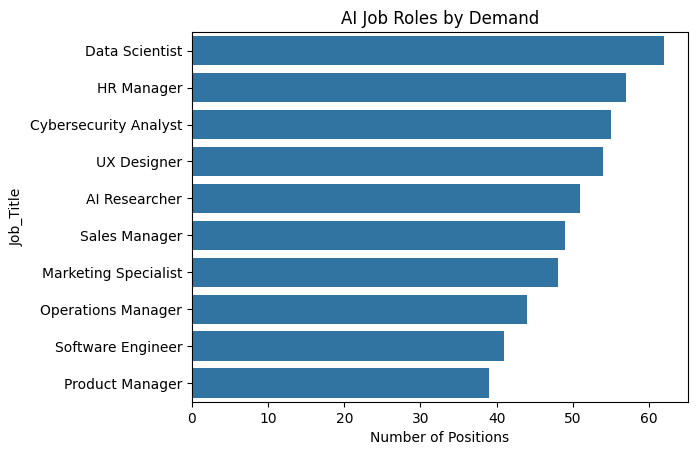

In [79]:
job_counts = df['Job_Title'].value_counts()

sns.barplot(x=job_counts.values, y=job_counts.index)
plt.title('AI Job Roles by Demand')
plt.xlabel('Number of Positions')
plt.show()

**Conclusion**:

- Data Scientist roles have the most demand while product managers have the lowest demand

#### Average Salary for each Job Title

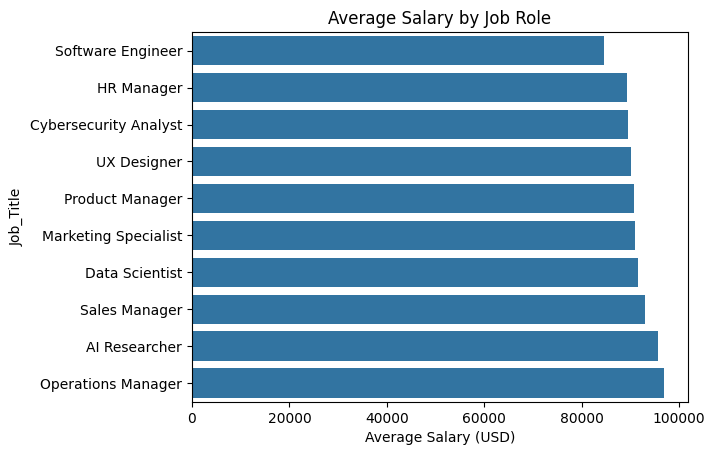

Job_Title
Software Engineer        84490.542038
HR Manager               89251.780747
Cybersecurity Analyst    89429.064689
UX Designer              90157.291938
Product Manager          90802.642422
Marketing Specialist     90961.147148
Data Scientist           91480.756134
Sales Manager            92926.644659
AI Researcher            95583.346966
Operations Manager       96937.230841
Name: Salary_USD, dtype: float64

In [80]:
avg_salary_job = df.groupby('Job_Title')['Salary_USD'].mean().sort_values()

sns.barplot(x=avg_salary_job.values, y=avg_salary_job.index)
plt.title('Average Salary by Job Role')
plt.xlabel('Average Salary (USD)')
plt.show()

avg_salary_job

In [81]:
df.Job_Title.value_counts()

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

**Conclusion**:

- Operations Managers recieve the highest average salary while Software Engineeers receive the lowest.

#### Distribution of Jobs across Location

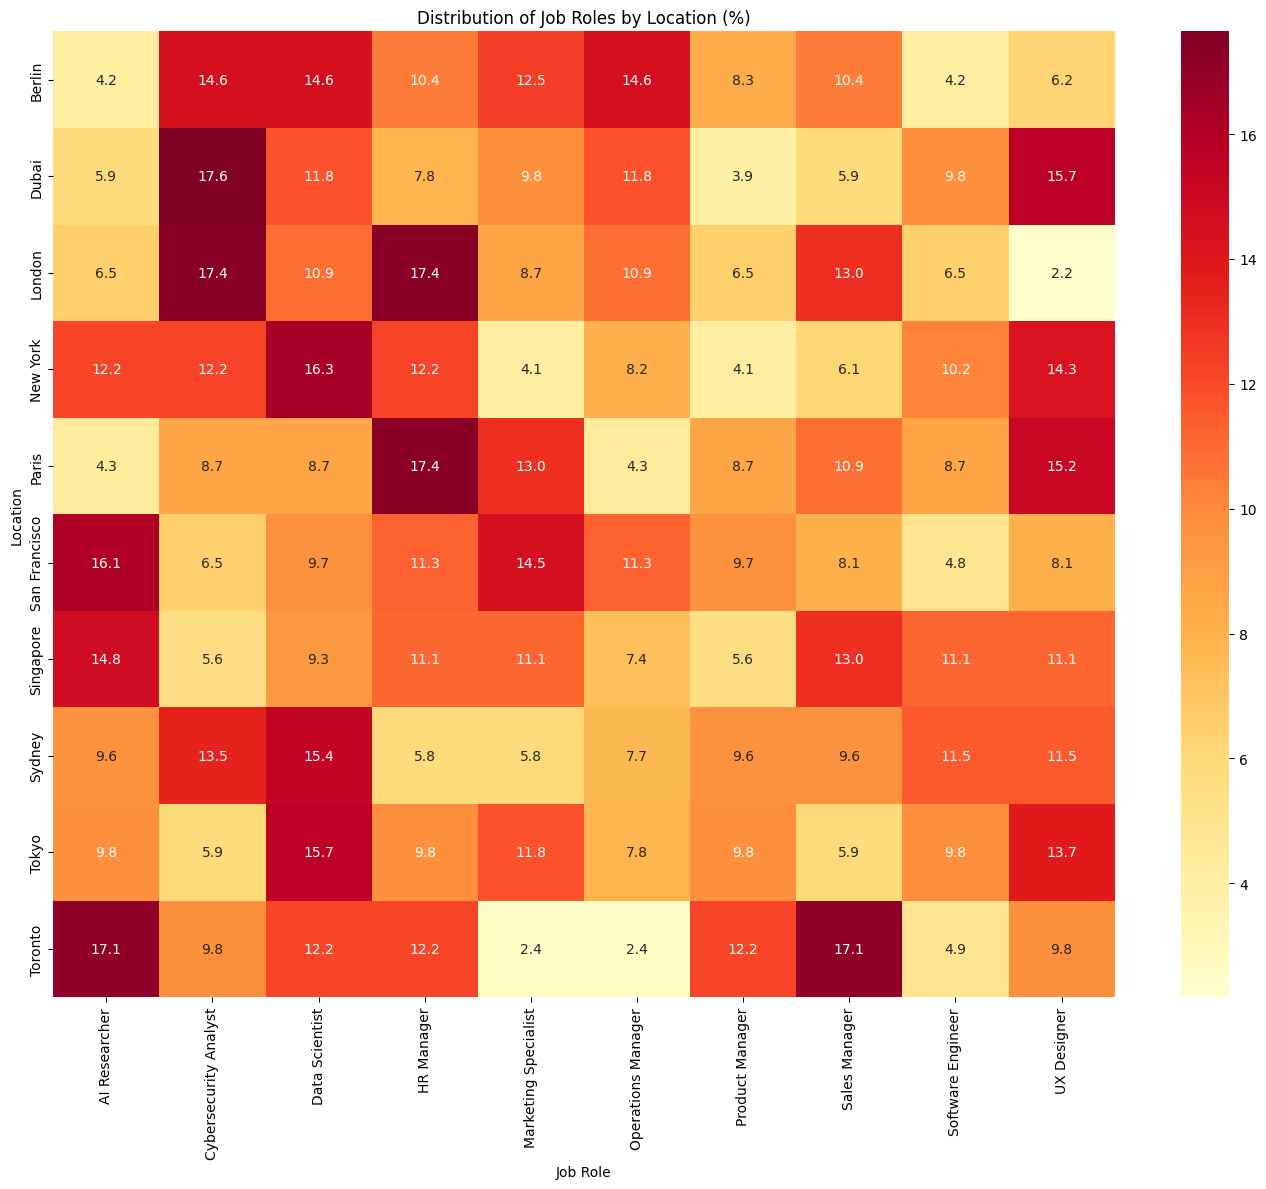

In [82]:
location_role_matrix = pd.crosstab(df['Location'], df['Job_Title'], normalize='index') * 100
# location_role_matrix = pd.crosstab(df['Location'], df['Job_Title'])

plt.figure(figsize=(14, 12))
sns.heatmap(location_role_matrix, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Distribution of Job Roles by Location (%)')
plt.xlabel('Job Role')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

#### Growth Projection for Each Job

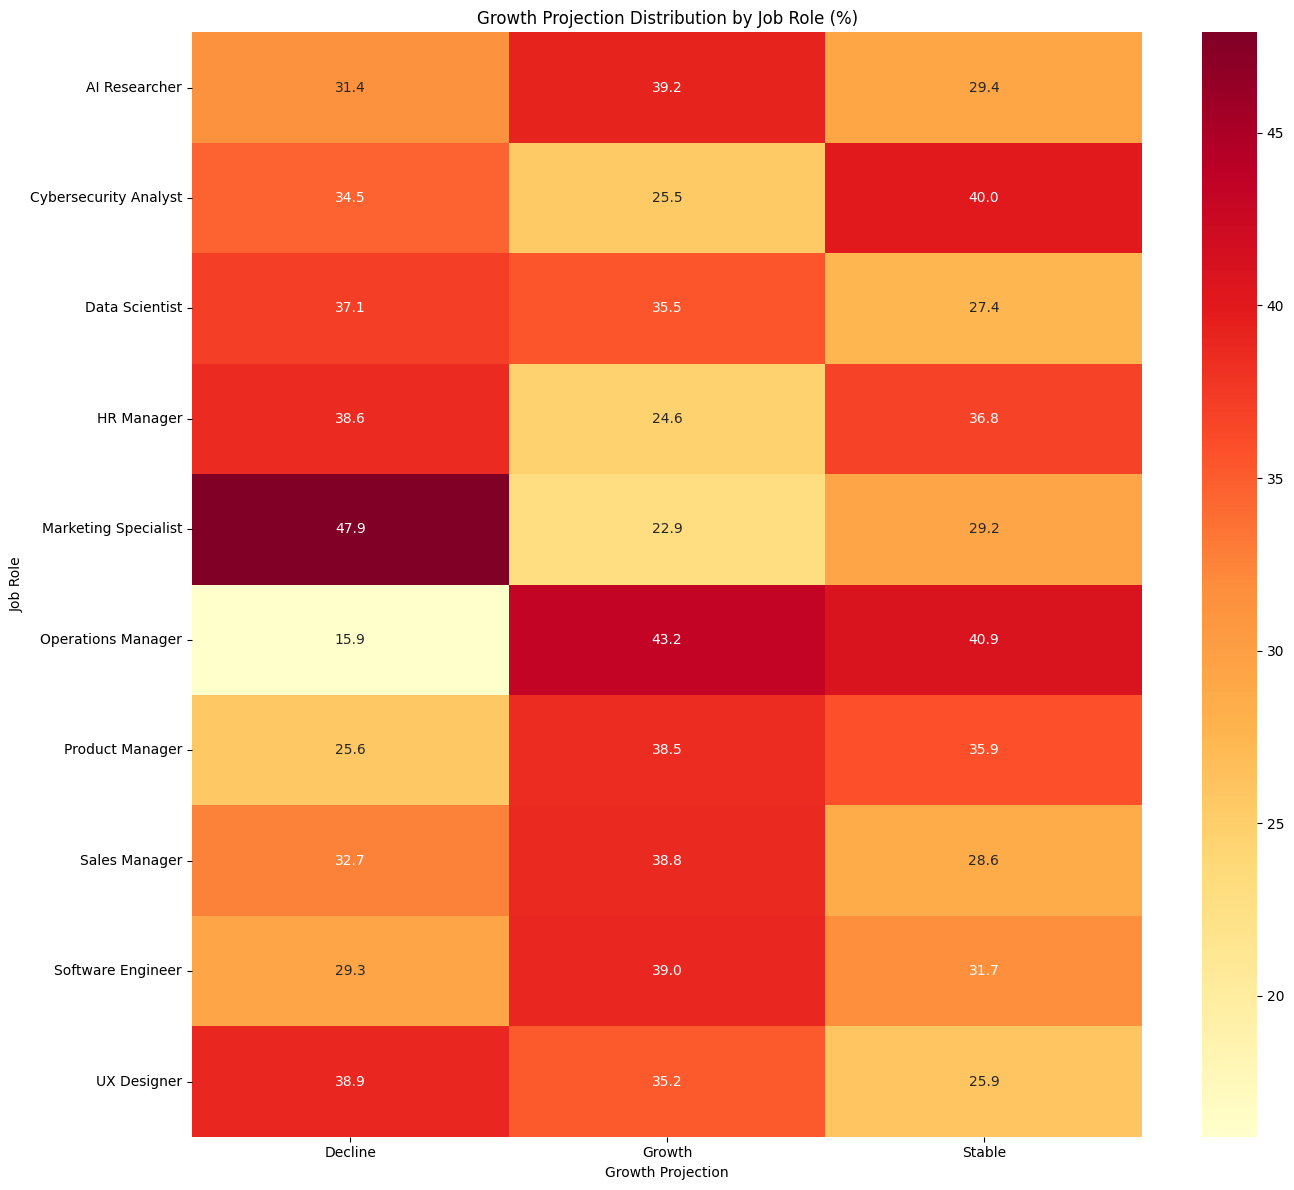

In [83]:
role_growth_matrix = pd.crosstab(df['Job_Title'], df['Job_Growth_Projection'], normalize='index') * 100
# role_growth_matrix = pd.crosstab(df['Job_Title'], df['Job_Growth_Projection'])

plt.figure(figsize=(14, 12))
sns.heatmap(role_growth_matrix, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Growth Projection Distribution by Job Role (%)')
plt.xlabel('Growth Projection')
plt.ylabel('Job Role')

plt.tight_layout()
plt.show()

#### Summary of Findings

In [ ]:
# Print detailed analysis
print("\nDetailed Analysis:")

print("\n1. Top Job Roles by Demand:")
print(job_counts.head())

print("\n2. Average Salary by Role:")
print(avg_salary_job.round(2))

print("\n3. Top Locations for Each Role:")
for role in df['Job_Title'].unique():
    role_locations = df[df['Job_Title'] == role]['Location'].value_counts().head(3)
    print(f"\n{role}:")
    print(role_locations)

print("\n4. Growth Projection Summary by Role:")
growth_summary = pd.crosstab(df['Job_Title'], df['Job_Growth_Projection'])
print(growth_summary)


Detailed Analysis:

1. Top Job Roles by Demand:
Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Name: count, dtype: int64

2. Average Salary by Role:
Job_Title
Software Engineer        84490.54
HR Manager               89251.78
Cybersecurity Analyst    89429.06
UX Designer              90157.29
Product Manager          90802.64
Marketing Specialist     90961.15
Data Scientist           91480.76
Sales Manager            92926.64
AI Researcher            95583.35
Operations Manager       96937.23
Name: Salary_USD, dtype: float64

3. Top Locations for Each Role:

Cybersecurity Analyst:
Location
Dubai     9
London    8
Sydney    7
Name: count, dtype: int64

Marketing Specialist:
Location
San Francisco    9
Singapore        6
Berlin           6
Name: count, dtype: int64

AI Researcher:
Location
San Francisco    10
Singapore         8
Toronto           7
Name: count, dtype: int64

Sales Man

Creating a combined plot

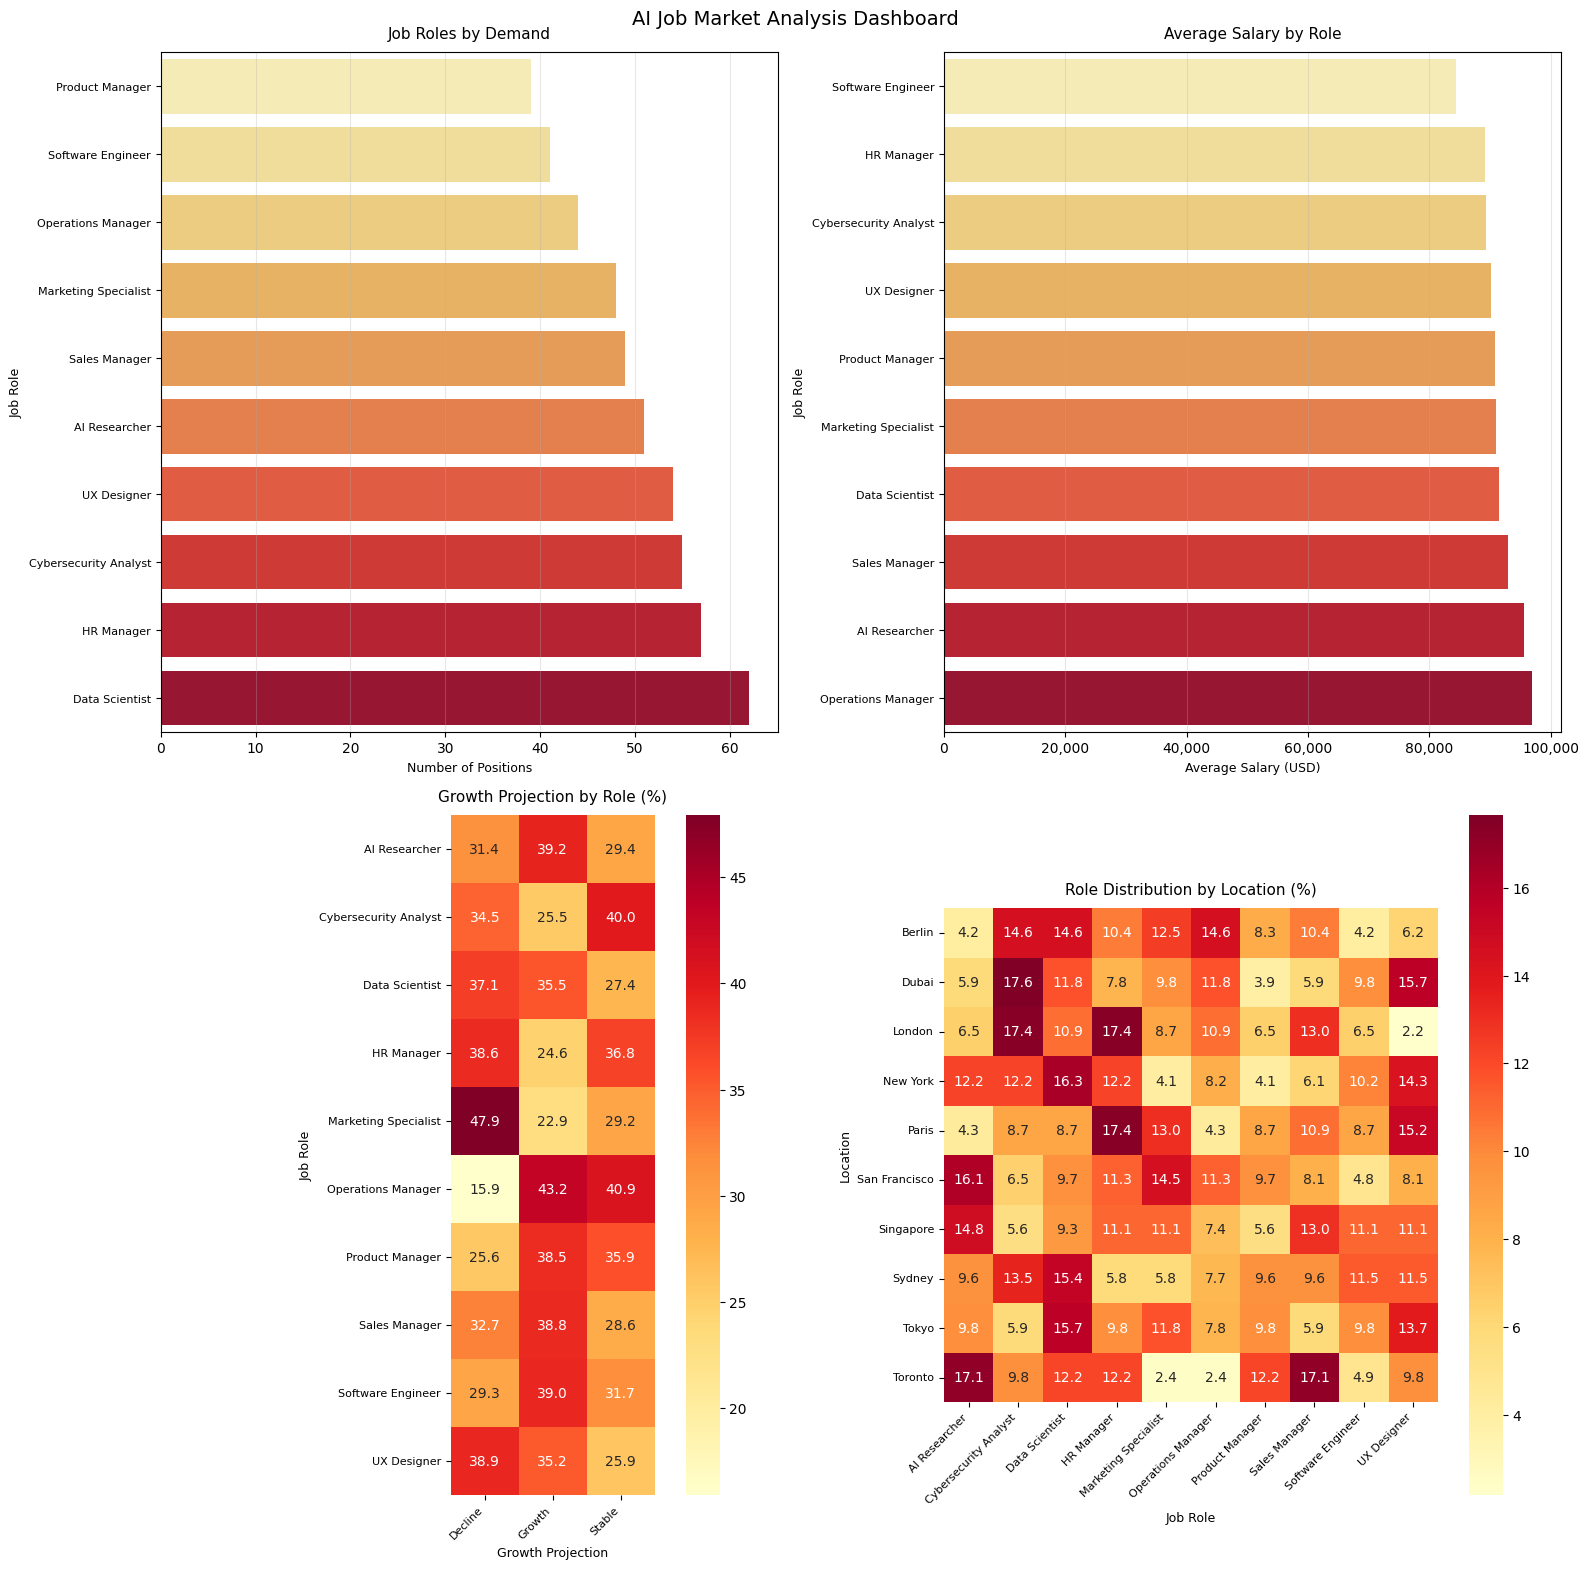

In [85]:
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

# 1. Growth Projection Heatmap (top left)
ax1 = fig.add_subplot(gs[1, 0])
role_growth_matrix = pd.crosstab(df['Job_Title'], df['Job_Growth_Projection'], normalize='index') * 100
sns.heatmap(role_growth_matrix, cmap='YlOrRd', annot=True, fmt='.1f', ax=ax1, square=True)
ax1.set_title('Growth Projection by Role (%)', pad=10, fontsize=11)
ax1.set_xlabel('Growth Projection', fontsize=9)
ax1.set_ylabel('Job Role', fontsize=9)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.setp(ax1.get_yticklabels(), fontsize=8)

# 2. Location-Role Distribution Heatmap (top right)
ax2 = fig.add_subplot(gs[1, 1])
location_role_matrix = pd.crosstab(df['Location'], df['Job_Title'], normalize='index') * 100
sns.heatmap(location_role_matrix, cmap='YlOrRd', annot=True, fmt='.1f', ax=ax2, square=True)
ax2.set_title('Role Distribution by Location (%)', pad=10, fontsize=11)
ax2.set_xlabel('Job Role', fontsize=9)
ax2.set_ylabel('Location', fontsize=9)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.setp(ax2.get_yticklabels(), fontsize=8)

# 3. Job Demand Bar Plot (bottom left)
ax3 = fig.add_subplot(gs[0, 0])
job_counts = df['Job_Title'].value_counts().reset_index()
job_counts.columns = ['Job_Title', 'Count']
job_counts = job_counts.sort_values(by='Count')
sns.barplot(data=job_counts, x='Count', y='Job_Title', hue='Job_Title', 
            ax=ax3, palette='YlOrRd', legend=False)
ax3.set_title('Job Roles by Demand', pad=10, fontsize=11)
ax3.set_xlabel('Number of Positions', fontsize=9)
ax3.set_ylabel('Job Role', fontsize=9)
plt.setp(ax3.get_yticklabels(), fontsize=8)
ax3.grid(True, axis='x', alpha=0.3)

# 4. Average Salary Bar Plot (bottom right)
ax4 = fig.add_subplot(gs[0, 1])
avg_salary_job = df.groupby('Job_Title')['Salary_USD'].mean().sort_values().reset_index()
sns.barplot(data=avg_salary_job, x='Salary_USD', y='Job_Title', hue='Job_Title',
            ax=ax4, palette='YlOrRd', legend=False)
ax4.set_title('Average Salary by Role', pad=10, fontsize=11)
ax4.set_xlabel('Average Salary (USD)', fontsize=9)
ax4.set_ylabel('Job Role', fontsize=9)
plt.setp(ax4.get_yticklabels(), fontsize=8)
ax4.grid(True, axis='x', alpha=0.3)
ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Overall title
plt.suptitle('AI Job Market Analysis Dashboard', fontsize=14)

# Adjust layout
plt.tight_layout()


plt.show()

## Creating a salary prediction model

Import libraries

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Preparing the data

In [87]:
model_df = df.copy()

Excluding some columns - Feature engineering

In [88]:
X = model_df.drop(['Salary_USD', 'Required_Skills'], axis=1)
y = df['Salary_USD']

Encoding the categorical features to be used

In [89]:
categorical_features = X.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

Create a Linear Regression Pipeline

In [90]:
model_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

Split the dataset

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

Train the model

In [92]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Remote_Friendly',
       'Job_Growth_Projection'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

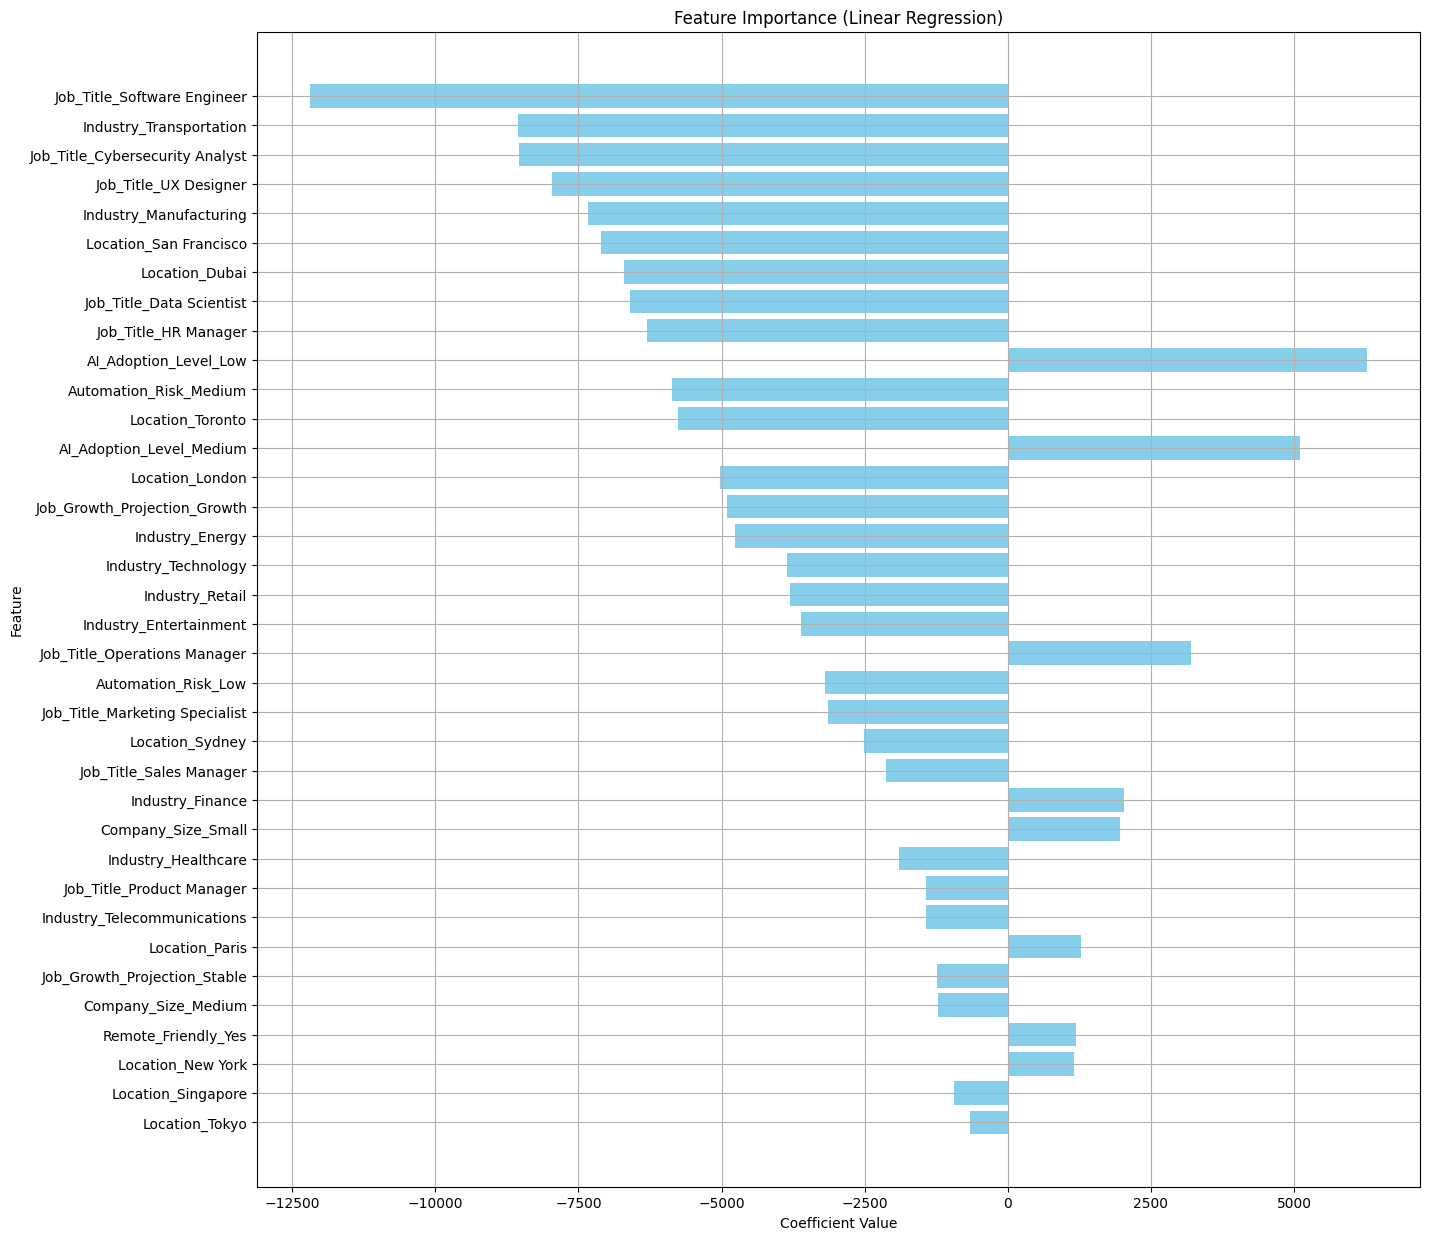

In [93]:
encoded_features = model_pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)
coefficients = model_pipeline.named_steps['regressor'].coef_

importance_df = pd.DataFrame({
    'Feature': encoded_features,
    'Coefficient': coefficients
})

importance_df['AbsCoefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='AbsCoefficient', ascending=False)
import matplotlib.pyplot as plt

# Bar plot for feature importance
plt.figure(figsize=(15, 15))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(True)
plt.show()


Make prediction

In [94]:
y_pred = model_pipeline.predict(X_test)

Evaluation Metrics

In [95]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")

Model Performance Metrics:
R² Score: -0.095
Mean Absolute Error: $17,732.35
Root Mean Squared Error: $22,698.13


Attemptin a kNN approach

In [96]:
from sklearn.neighbors import KNeighborsRegressor

# Feature selection (excluding 'Required_Skills' for simplicity)
X = df.drop(["Salary_USD", "Required_Skills"], axis=1)
y = df["Salary_USD"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Preprocessing: One-hot encode categorical features and scale numeric features
categorical_features = X.columns
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# KNN pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('scaler', StandardScaler(with_mean=False)),  # Scale features
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # KNN with 5 neighbors
])

# Train the model
knn_pipeline.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluation
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Model Performance Metrics:")
print(f"R² Score: {r2_knn:.3f}")
print(f"Mean Absolute Error: ${mae_knn:,.2f}")
print(f"Root Mean Squared Error: ${rmse_knn:,.2f}")


KNN Model Performance Metrics:
R² Score: -0.078
Mean Absolute Error: $18,327.04
Root Mean Squared Error: $22,528.18


Using random forest instead

In [202]:
from sklearn.ensemble import RandomForestRegressor

In [209]:
X = df.drop(columns=['Salary_USD'])
y = df['Salary_USD']

# Encoding the categorical features
categorical_features = X.columns.to_list()
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 80-20 data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

Measuring the importance of each feature

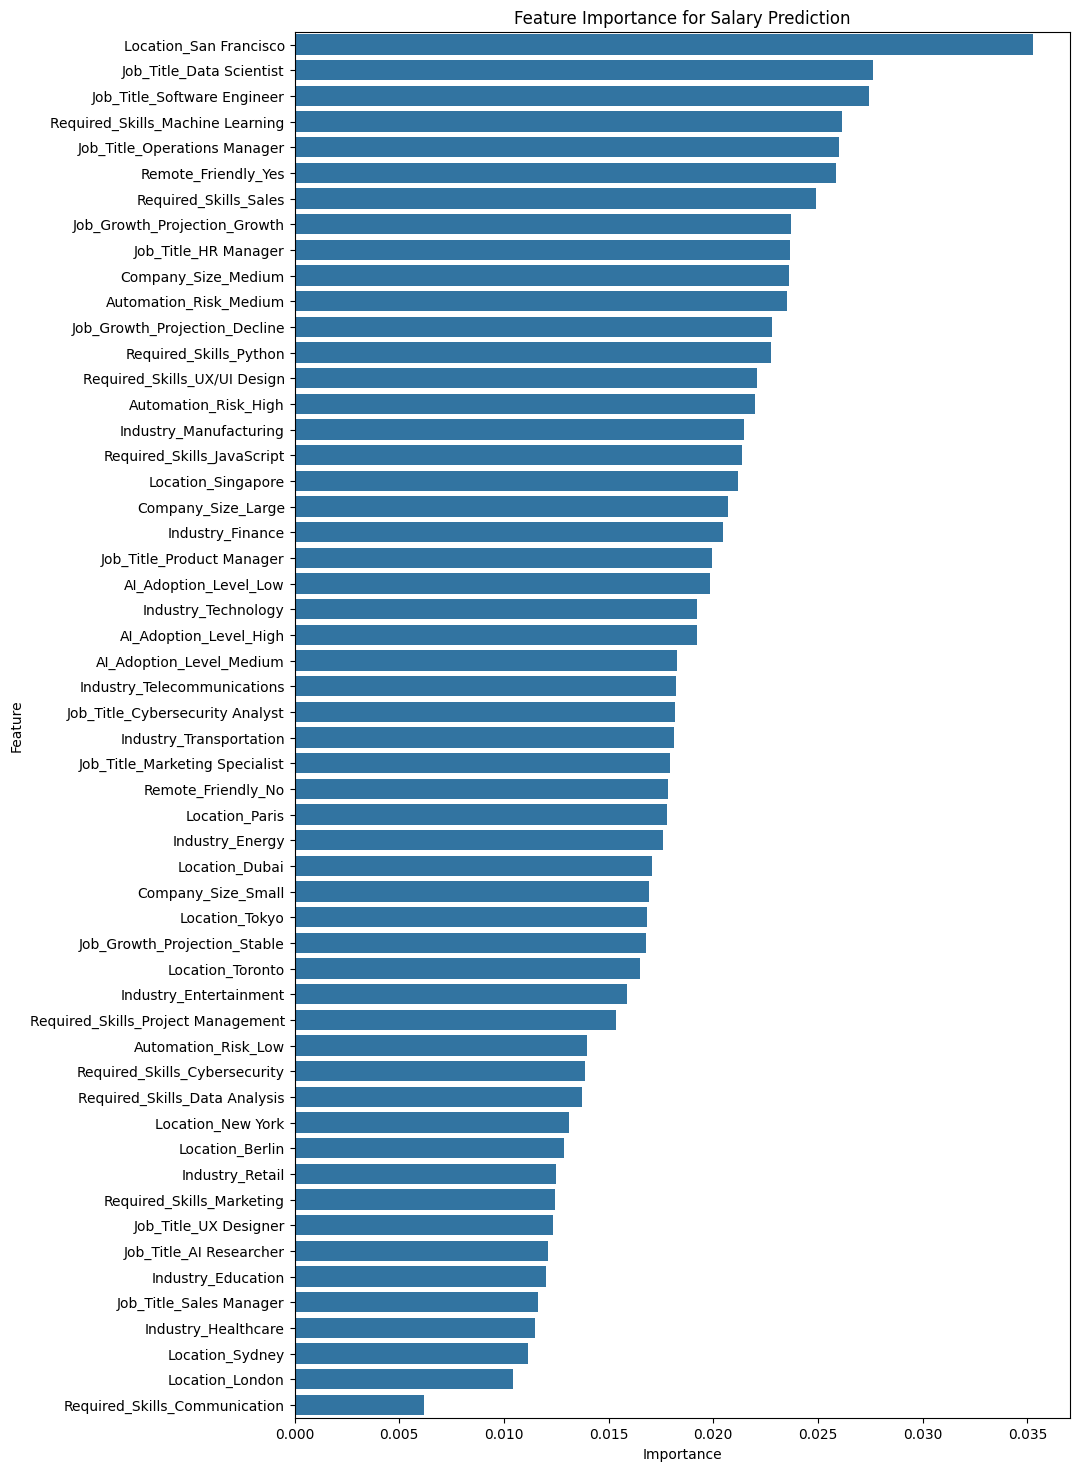

In [210]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=16, random_state=69))
])

# Training the model
model.fit(X_train, y_train)

# Extracting feature names after their encoding
feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
importances = model.named_steps['regressor'].feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 18))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)  # Show top 20 features
plt.title('Feature Importance for Salary Prediction')
plt.show()

Using the top 20 features to train the model

In [211]:
feature_importance_opt = feature_importance_df.head(20)
top_features = feature_importance_opt['Feature'].tolist()

X_encoded = pd.get_dummies(X)
X_final = X_encoded[top_features]

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=69)

rf_optimal = RandomForestRegressor(n_estimators=16, random_state=69)
rf_optimal.fit(X_train, y_train)

y_pred = rf_optimal.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Optimized Random Forest R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")

Optimized Random Forest R² Score: 0.0072
Mean Absolute Error: 17519.57
